# Yammer Customers Analysis
## Outline
Yammer is a social network for communicating with coworkers. Individuals share documents, updates, and ideas by posting them in groups. Yammer is free to use indefinitely, but companies must pay license fees if they want access to administrative controls, including integration with user management systems like ActiveDirectory. You sit in their centralized Analytics team, which sits in the Engineering organization.

It has been observed a very steep cliff into the weekly customer engagment. What caused the drop in user engagement? Based on what you observe in the data, what recommendations would you make to the organization?

## Key findings
Analysing the data we found:

The main problem could be related to the some issue on the connectivity, specifically, it should be some problem with the emails. Checking the emails it seems users got some problem with link, since the "email_clickthrough" event really shows a pronounced reduce.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import datetime as dt

# 0. Import data

In [2]:
df_email = pd.read_csv('yammer_emails.csv')
df_email.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


In [49]:
df_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90389 entries, 0 to 90388
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      90389 non-null  float64
 1   occurred_at  90389 non-null  object 
 2   action       90389 non-null  object 
 3   user_type    90389 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.8+ MB


In [3]:
df_event = pd.read_excel('yammer_events.xlsx')
df_event.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [4]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340832 entries, 0 to 340831
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      340832 non-null  int64         
 1   occurred_at  340832 non-null  datetime64[ns]
 2   event_type   340832 non-null  object        
 3   event_name   340832 non-null  object        
 4   location     340832 non-null  object        
 5   device       340832 non-null  object        
 6   user_type    325255 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 18.2+ MB


In [5]:
df_event1 = pd.read_csv('yammer_events_1.csv')
df_event1.head()

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type
0,0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [6]:
df_event1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170416 entries, 0 to 170415
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   170416 non-null  int64  
 1   user_id      170416 non-null  float64
 2   occurred_at  170416 non-null  object 
 3   event_type   170416 non-null  object 
 4   event_name   170416 non-null  object 
 5   location     170416 non-null  object 
 6   device       170416 non-null  object 
 7   user_type    154839 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ MB


In [7]:
df_event2 = pd.read_csv('yammer_events_2.csv')
df_event2.head()

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type
0,170416,7754.0,2014-06-26 08:41:54,engagement,like_message,United States,amazon fire phone,1.0
1,170417,7754.0,2014-06-26 08:42:24,engagement,send_message,United States,amazon fire phone,1.0
2,170418,7754.0,2014-06-26 08:42:37,engagement,home_page,United States,amazon fire phone,1.0
3,170419,7754.0,2014-06-26 08:43:06,engagement,send_message,United States,amazon fire phone,1.0
4,170420,7754.0,2014-06-26 08:43:43,engagement,home_page,United States,amazon fire phone,1.0


In [8]:
df_event2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170416 entries, 0 to 170415
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   170416 non-null  int64  
 1   user_id      170416 non-null  float64
 2   occurred_at  170416 non-null  object 
 3   event_type   170416 non-null  object 
 4   event_name   170416 non-null  object 
 5   location     170416 non-null  object 
 6   device       170416 non-null  object 
 7   user_type    170416 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ MB


It seems that event table is the sum of event1 table and event2 table 

In [9]:
df_exp = pd.read_excel('yammer_experiments.xlsx')
df_exp.head()

,user_id,occurred_at,experiment,experiment_group,location,device,user_type
0,4,2014-06-05 15:20:16,publisher_update,control_group,India,lenovo thinkpad,3
1,8198,2014-06-11 09:31:32,publisher_update,control_group,Japan,nokia lumia 635,1
2,11,2014-06-17 09:31:22,publisher_update,control_group,United States,iphone 4s,1
3,8209,2014-06-04 09:31:21,publisher_update,test_group,Turkey,nokia lumia 635,1
4,19,2014-06-04 09:31:33,publisher_update,test_group,Nigeria,iphone 5,1


In [10]:
df_users = pd.read_excel('yammer_users.xlsx')
df_users.head()

,user_id,created_at,company_id,language,activated_at,state
0,0,2013-01-01 20:59:39,5737,english,2013-01-01 21:01:07,active
1,1,2013-01-01 13:07:46,28,english,NaT,pending
2,2,2013-01-01 10:59:05,51,english,NaT,pending
3,3,2013-01-01 18:40:36,2800,german,2013-01-01 18:42:02,active
4,4,2013-01-01 14:37:51,5110,indian,2013-01-01 14:39:05,active


In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       19066 non-null  int64         
 1   created_at    19066 non-null  datetime64[ns]
 2   company_id    19066 non-null  int64         
 3   language      19066 non-null  object        
 4   activated_at  9381 non-null   datetime64[ns]
 5   state         19066 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 893.8+ KB


# 1. EDA

Mainly examine df_users; df_emails; df_events

## 1.1 df_users

In [38]:
# df_users['active'] = np.where(df_users['state'] == 'active',1,0)

In [40]:
# df_users['activated_at_m'] = pd.to_datetime(df_users['activated_at']) - pd.to_timedelta(7, unit='d')
# df_users2 = df_users.groupby(pd.Grouper(key='activated_at_m', freq='W-MON'))['active'].sum().reset_index().sort_values('activated_at_m')

In [12]:
df_users.head()

,user_id,created_at,company_id,language,activated_at,state
0,0,2013-01-01 20:59:39,5737,english,2013-01-01 21:01:07,active
1,1,2013-01-01 13:07:46,28,english,NaT,pending
2,2,2013-01-01 10:59:05,51,english,NaT,pending
3,3,2013-01-01 18:40:36,2800,german,2013-01-01 18:42:02,active
4,4,2013-01-01 14:37:51,5110,indian,2013-01-01 14:39:05,active


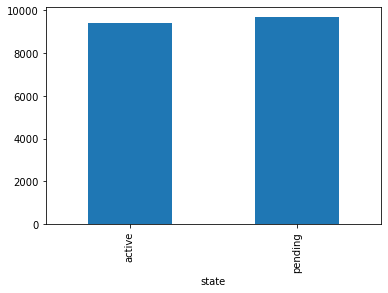

In [19]:
df_users.groupby('state')['state'].count().plot.bar()

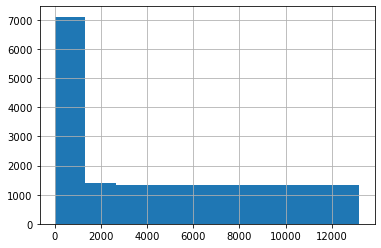

In [21]:
df_users.company_id.hist()

## 1.2 df_event

In [22]:
df_event.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


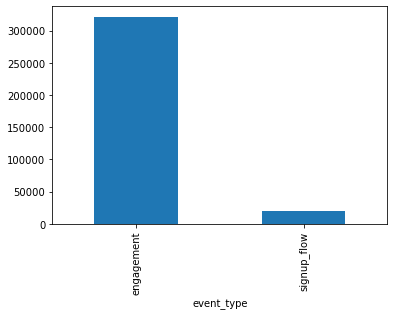

In [27]:
df_event.groupby('event_type')['event_type'].count().plot.bar()

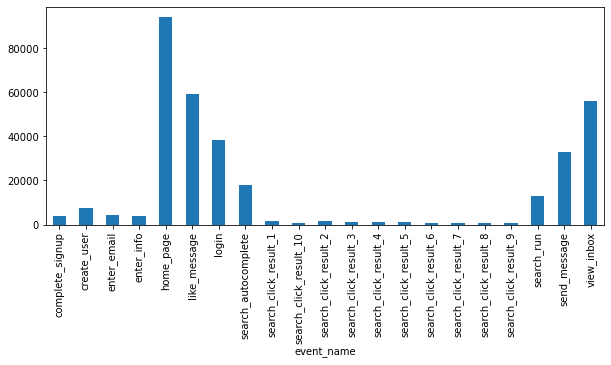

In [30]:
df_event.groupby('event_name')['event_name'].count().plot.bar(figsize=(10,4))

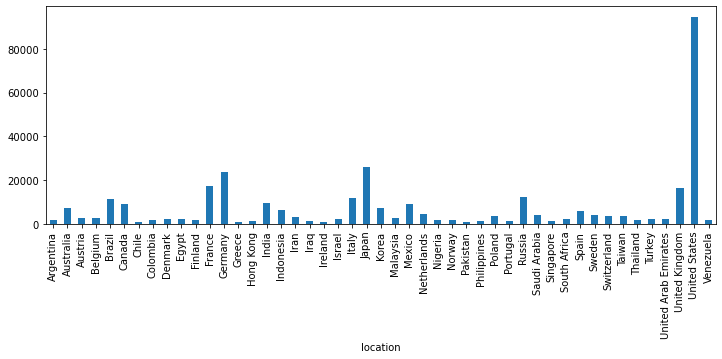

In [33]:
df_event.groupby('location')['location'].count().plot.bar(figsize=(12,4))

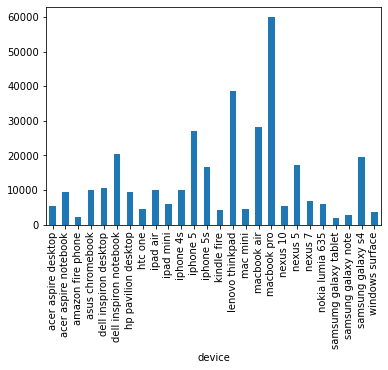

In [34]:
df_event.groupby('device')['device'].count().plot.bar()

In [38]:
df_event['occurred_at'] = pd.to_datetime(df_event['occurred_at'] )
import datetime as dt
df_event['week'] = df_event['occurred_at'].dt.week
df_event.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,week
0,10522,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,18
1,10522,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,18
2,10522,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,18
3,10522,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,18
4,10522,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,18


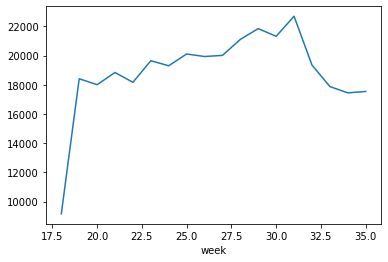

In [39]:
# number of weekly event with time 
df_event.groupby('week')['week'].count().plot()

number of weekly event suddently decrease from 31st week

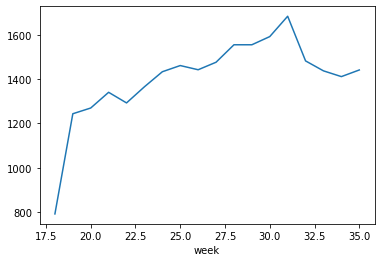

In [45]:
# number of weekly users with time: everyweek how many unique users  
df_event.groupby(['week'])['user_id'].nunique().plot()

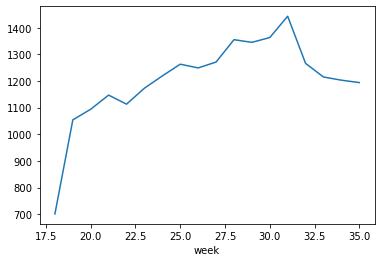

In [47]:
# correct with only event_type = engagement
df_event[df_event['event_type'] == 'engagement'].groupby(['week'])['user_id'].nunique().plot()

Clearly, the problem occurs in 31st - 32nd week.

## 1.3 df_emails

In [131]:
df_email.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


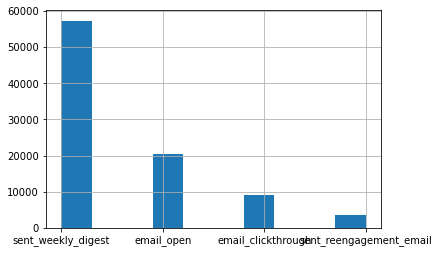

In [133]:
df_email['action'].hist()

# 2. Examination

Merge users info (company id) with the event table, and mainly examine the features of company_id, event_name, location, device

In [159]:
df_event_m = df_event[df_event['event_type'] == 'engagement']
df_merge = pd.merge(df_event_m, df_users[['user_id','company_id']], on = 'user_id')
df_merge.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,week,company_id
0,10522,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,18,1147
1,10522,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,18,1147
2,10522,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,18,1147
3,10522,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,18,1147
4,10522,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,18,1147


In [137]:
for col in ['company_id', 'event_name', 'location', 'device']:
    print(df_merge[col].nunique())

4453
17
47
26


## 2.1 Focu on 31, 32 week
There are >10 categories in each of the features, which causes difficulties to examine one by one. Therefore, will focus on the 31st and 32nd and check the distribution difference of each feature.

In [158]:
df_merge = df_merge[df_merge['week'].isin([31,32])]
def dist31_32(feature,figsizes,bin):    
    df_merge[df_merge['week'] ==31][feature].hist(figsize = figsizes, bins =bin)
    df_merge[df_merge['week'] ==32][feature].hist(figsize = figsizes, bins =bin) 

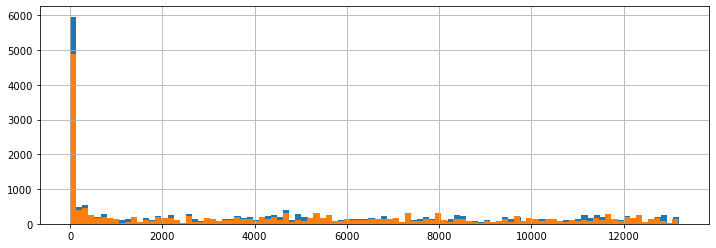

In [99]:
# company_id
dist31_32('company_id',(12,4),100)

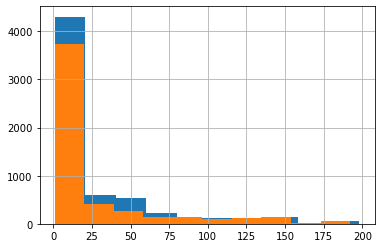

In [100]:
# company_id: more details
df_merge[(df_merge['week'] ==31) & (df_merge['company_id'] <200)].company_id.hist()
df_merge[(df_merge['week'] ==32)& (df_merge['company_id'] <200)].company_id.hist()

It seems that some companies is effected more, need to reexamine.

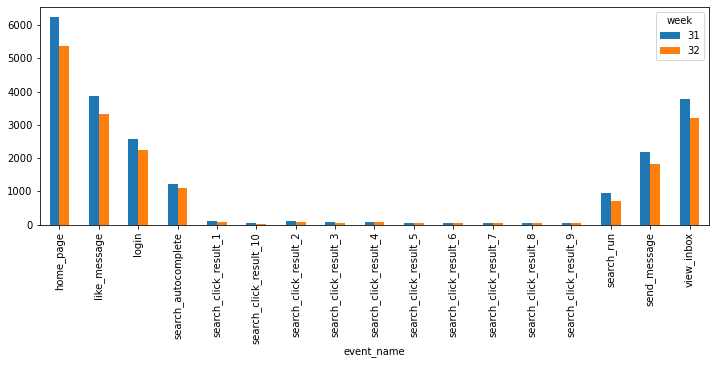

In [157]:
# event_name
def dist31_32bar(feature,figsizes): 
    pd.crosstab(df_merge[feature], df_merge.week).plot(kind='bar',figsize = figsizes)  
def dist31_32barNorm(feature,figsizes): 
    pd.crosstab(df_merge[feature], df_merge.week).apply(lambda r: r/r.sum(), axis=0).plot(kind='bar',figsize = figsizes)
    
dist31_32bar('event_name',(12,4))

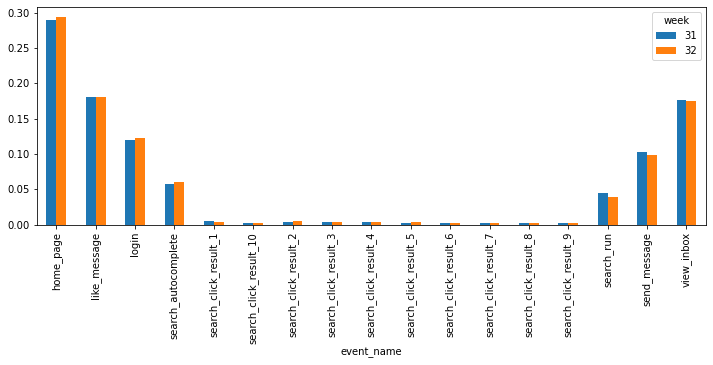

In [129]:
dist31_32barNorm('event_name',(12,4))

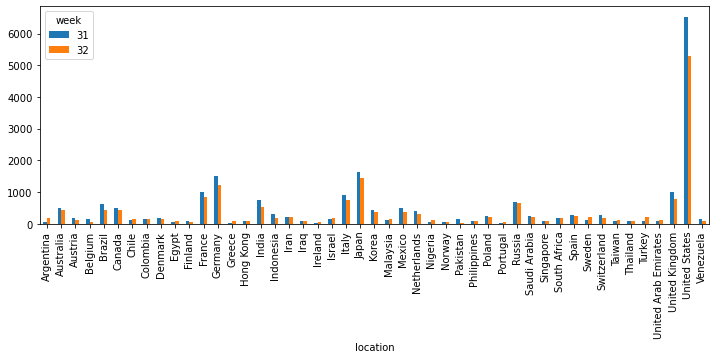

In [120]:
dist31_32bar('location',(12,4))

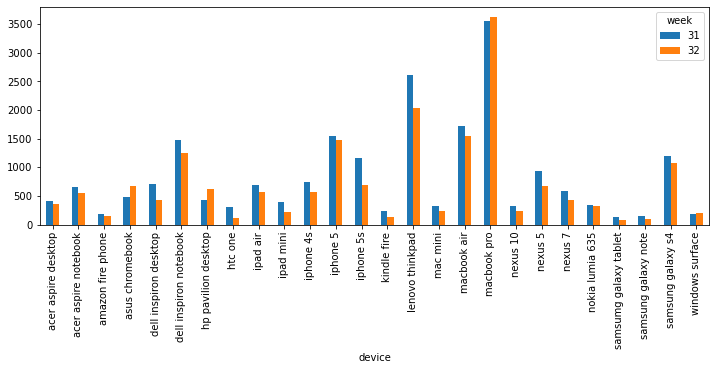

In [121]:
dist31_32bar('device',(12,4))

## 3.2 change with time

In [138]:
for col in ['event_name', 'device']:
    print(df_merge[col].unique())

['login' 'home_page' 'like_message' 'view_inbox' 'search_run'
 'send_message' 'search_click_result_7' 'search_click_result_8'
 'search_click_result_9' 'search_click_result_2' 'search_click_result_1'
 'search_click_result_4' 'search_click_result_3' 'search_click_result_6'
 'search_autocomplete' 'search_click_result_5' 'search_click_result_10']
['Japan' 'Netherlands' 'Austria' 'Finland' 'United Kingdom' 'India'
 'United States' 'France' 'Iran' 'Germany' 'Australia' 'Brazil' 'Thailand'
 'Russia' 'Taiwan' 'Canada' 'Spain' 'Israel' 'Colombia' 'Iraq' 'Indonesia'
 'Korea' 'United Arab Emirates' 'Belgium' 'Saudi Arabia' 'Sweden' 'Poland'
 'Mexico' 'Italy' 'Egypt' 'Nigeria' 'Pakistan' 'Portugal' 'Venezuela'
 'Hong Kong' 'Switzerland' 'Denmark' 'Norway' 'Greece' 'Ireland'
 'South Africa' 'Malaysia' 'Philippines' 'Argentina' 'Turkey' 'Singapore'
 'Chile']
['dell inspiron notebook' 'lenovo thinkpad' 'iphone 5s' 'iphone 5'
 'nexus 10' 'macbook air' 'iphone 4s' 'kindle fire' 'windows surface'
 'dell

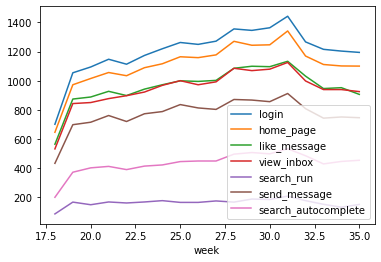

In [153]:
main_event = ['login', 'home_page', 'like_message' ,'view_inbox' ,'search_run',
 'send_message' ,'search_autocomplete']
# df_merge[df_merge['event_name'] == 'login'].groupby(['week'])['user_id'].nunique().plot()
for col in main_event:
     ax = df_merge[df_merge['event_name'] == col].groupby(['week'])['user_id'].nunique().plot()
     ax.legend(main_event)

The main decrease is on home_page, like_message, view_inbox, send_message 

## 3.3 Emails: more about the event of message 

In [148]:
df_email['occurred_at'] = pd.to_datetime(df_email['occurred_at'])

In [149]:
df_email['week'] = df_email['occurred_at'].dt.week

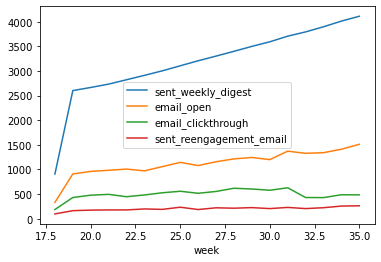

In [161]:
actions = df_email['action'].unique() 
for col in actions:
     ax =df_email[df_email['action'] == col].groupby(['week'])['user_id'].nunique().plot()
     ax.legend(actions)

Clearly, number of users who did email_clickthrough decrease significanly. 

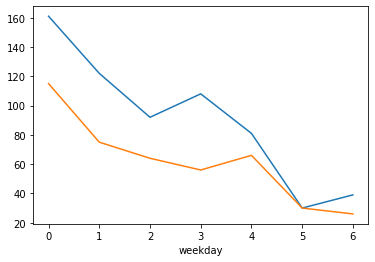

In [178]:
# Any particular time has the difficult?
df_email['weekday'] = df_email['occurred_at'].dt.weekday
df_email[(df_email['action'] == 'email_clickthrough')& (df_email['week'] == 31)].groupby(['weekday'])['user_id'].nunique().plot()
df_email[(df_email['action'] == 'email_clickthrough')& (df_email['week'] == 32)].groupby(['weekday'])['user_id'].nunique().plot()


No issue with time

In [184]:
# Any particular device has the difficult?
df_email2 = pd.merge(df_email, df_event, on='occurred_at')
df_email2.head()

,user_id_x,occurred_at,action,user_type_x,week_x,weekday,user_id_y,event_type,event_name,location,device,user_type_y,week_y
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0,19,1,11877,engagement,send_message,Portugal,iphone 5,1.0,19
1,4.0,2014-05-06 09:30:00,sent_weekly_digest,3.0,19,1,11877,engagement,send_message,Portugal,iphone 5,1.0,19
2,8.0,2014-05-06 09:30:00,sent_weekly_digest,3.0,19,1,11877,engagement,send_message,Portugal,iphone 5,1.0,19
3,11.0,2014-05-06 09:30:00,sent_weekly_digest,1.0,19,1,11877,engagement,send_message,Portugal,iphone 5,1.0,19
4,78.0,2014-05-06 09:30:00,sent_weekly_digest,2.0,19,1,11877,engagement,send_message,Portugal,iphone 5,1.0,19


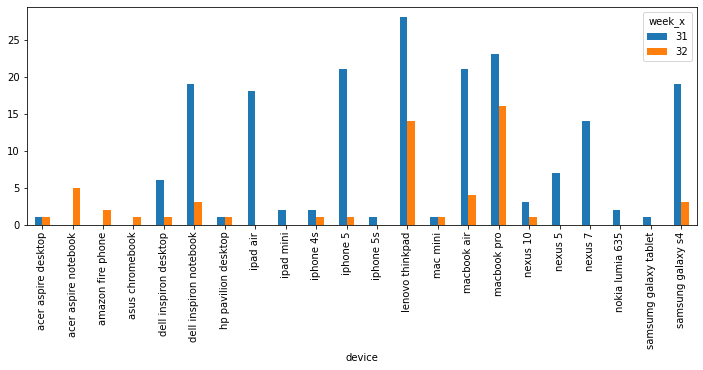

In [190]:
df_device = df_email2[(df_email2['action'] == 'email_clickthrough') &(df_device['week_x'].isin([31,32]))]
pd.crosstab(df_device['device'], df_device['week_x']).plot(kind='bar',figsize =(12,4))  

Phone, laptop and notebook are all influenced, so it might not because of device. 